# Imports and Constants

In [1]:
import rhythm_regression.notebook_tools as nbt
import rhythm_regression.audio_processing as ap

import librosa
# import IPython.display as ipd  # for playback widget in cell below

import warnings
warnings.filterwarnings('ignore')

SAMPLING_RATE = 22050
HOP_LENGTH = 300
FRAME_LENGTH = 600

# Importing Data Samples

In [2]:
samples = [47, 66, 79, 95]
sample_names = [f'Sample {sample}.m4a' for sample in samples]
sample_paths = [f'./data/audio/{name}' for name in sample_names]

In [3]:
signals =[]

for i in range(len(samples)):
    signal = librosa.load(sample_paths[i])[0]
    signals.append(signal)
    print(f'{sample_names[i]} has shape {signals[i].shape}')

Sample 47.m4a has shape (653856,)
Sample 66.m4a has shape (888586,)
Sample 79.m4a has shape (1003834,)
Sample 95.m4a has shape (995367,)


# Visualizing Samples

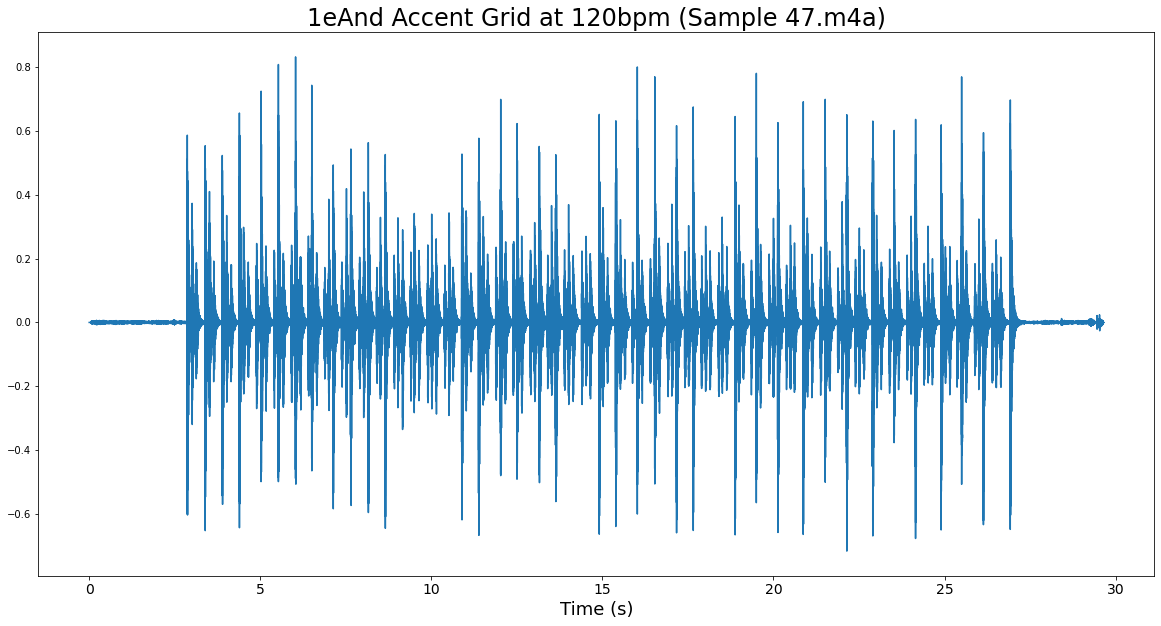

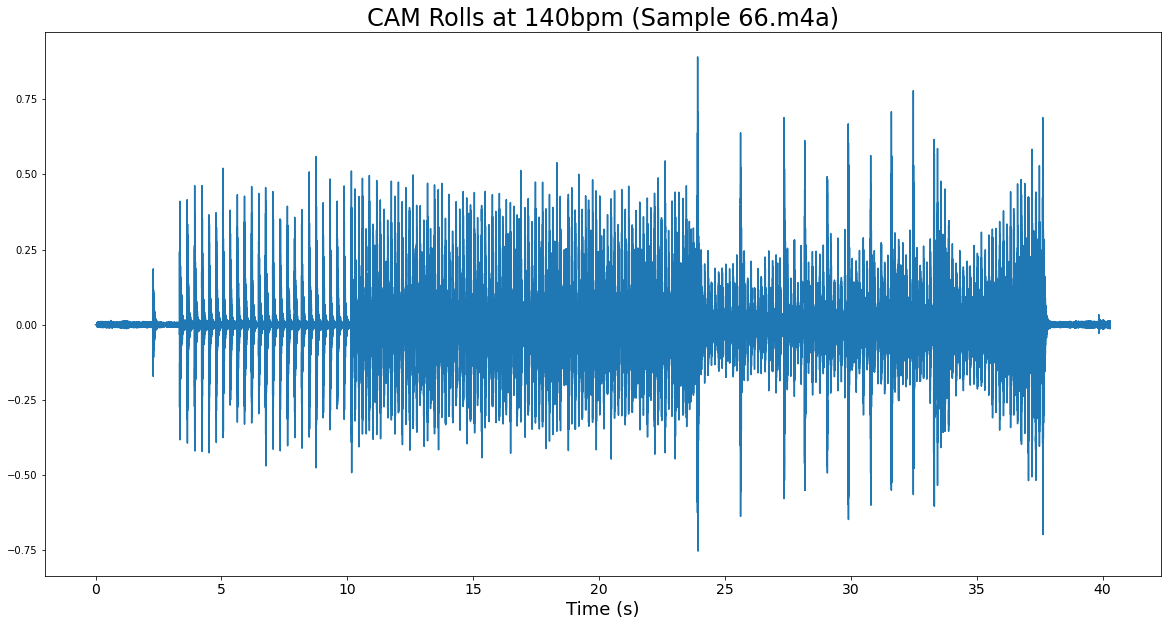

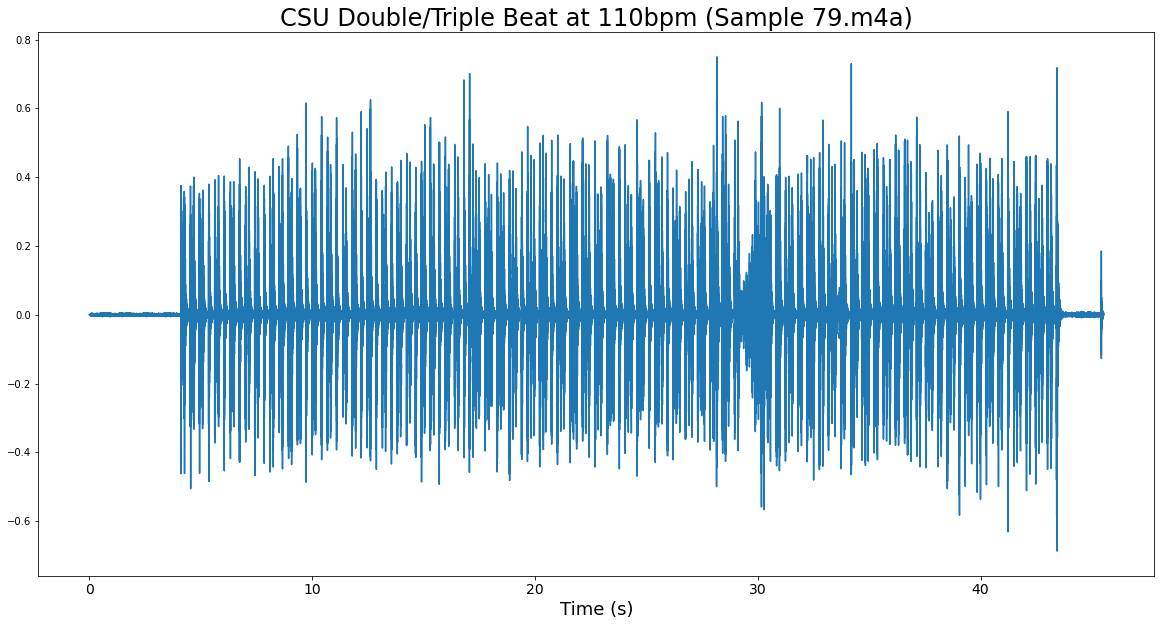

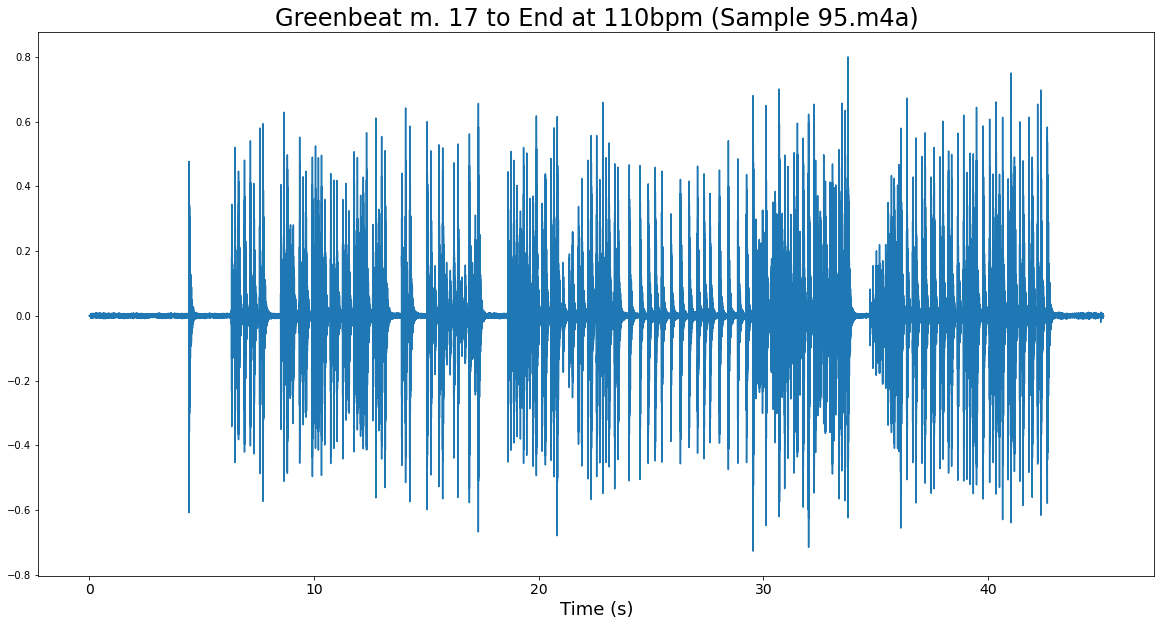

In [4]:
plot_titles = [f'1eAnd Accent Grid at 120bpm ({sample_names[0]})', 
               f'CAM Rolls at 140bpm ({sample_names[1]})',
               f'CSU Double/Triple Beat at 110bpm ({sample_names[2]})',
               f'Greenbeat m. 17 to End at 110bpm ({sample_names[3]})']

for i in range(len(signals)):
    nbt.plot_signal(signals[i], title=plot_titles[i])

# Calculating Transients

In [12]:
transients = [ap.rms_energy_transients(signal, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH, amplitude_threshold=0.02) for signal in signals]
for i in range(len(transients)):
    print(f'{plot_titles[i]} has {len(transients[i])} transients')

1eAnd Accent Grid at 120bpm (Sample 47.m4a) has 145 transients
CAM Rolls at 140bpm (Sample 66.m4a) has 290 transients
CSU Double/Triple Beat at 110bpm (Sample 79.m4a) has 202 transients
Greenbeat m. 17 to End at 110bpm (Sample 95.m4a) has 196 transients


# Accents and Taps in 1eAnd Accent Grid

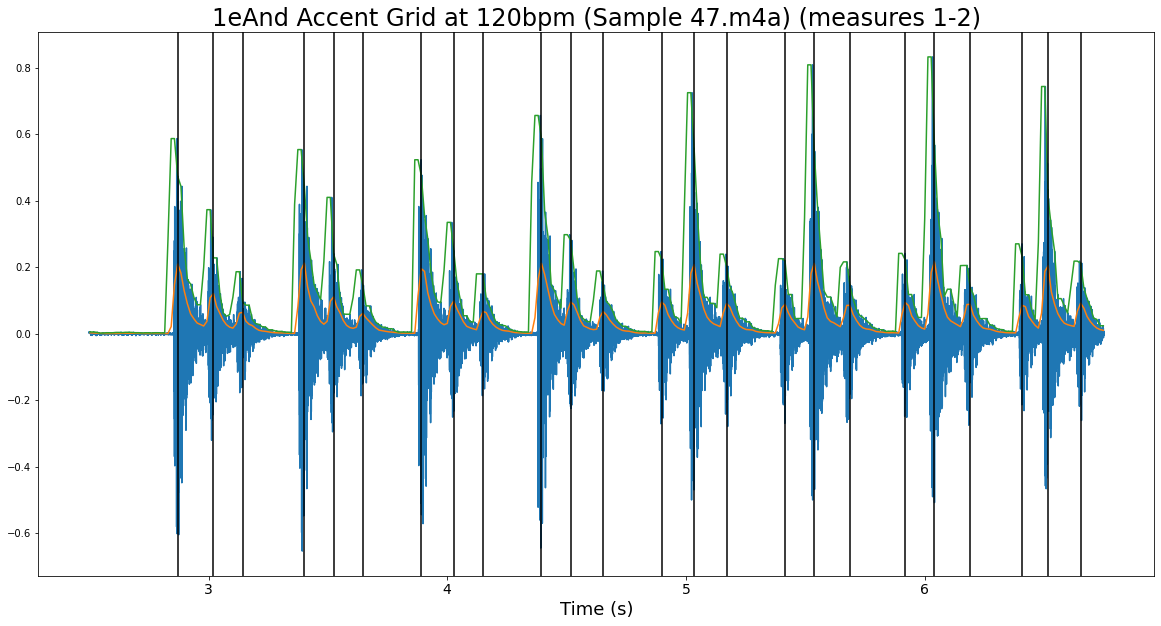

In [6]:
time_range = (2.5, 6.75)
#time_range = (0,60)

axs = nbt.plot_signal(signals[0], time_range=time_range)

axs = nbt.plot_rms_energy(signals[0], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, time_range=time_range, 
                          fmt='-', original_signal=False, axs=axs)
                          
axs = nbt.plot_amplitude_envelope(signals[0], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, 
                            title=plot_titles[0] + ' (measures 1-2)', time_range=time_range, 
                            fmt='-', original_signal=False, axs=axs)

for transient in transients[0]:
    if time_range[0] <= transient <= time_range[1]:
        axs.axvline(transient, color='black')


# Double / Triple Strokes

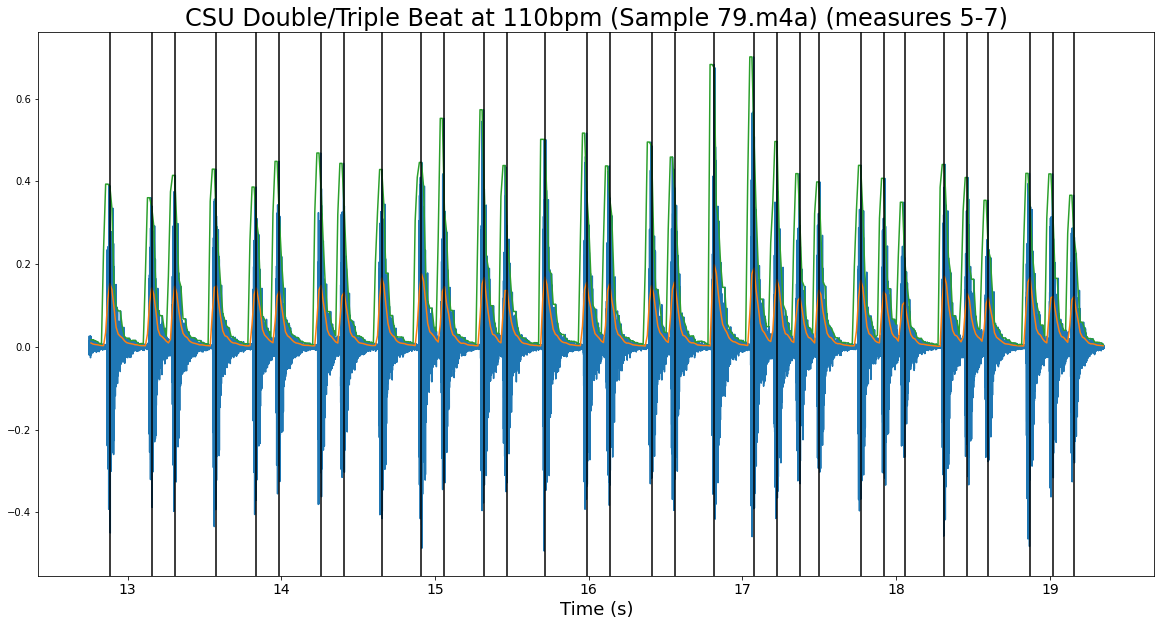

In [7]:
time_range = (12.75, 19.35)
#time_range = (27,31) # cressendo before C

axs = nbt.plot_signal(signals[2], time_range=time_range)

axs = nbt.plot_rms_energy(signals[2], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, time_range=time_range, 
                          fmt='-', original_signal=False, axs=axs)
                          
axs = nbt.plot_amplitude_envelope(signals[2], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, 
                            title=plot_titles[2] + ' (measures 5-7)', time_range=time_range, 
                            fmt='-', original_signal=False, axs=axs)
        
for transient in transients[2]:
    if time_range[0] <= transient <= time_range[1]:
        axs.axvline(transient, color='black')

# Isolated Triplet Diddles in CAM Rolls

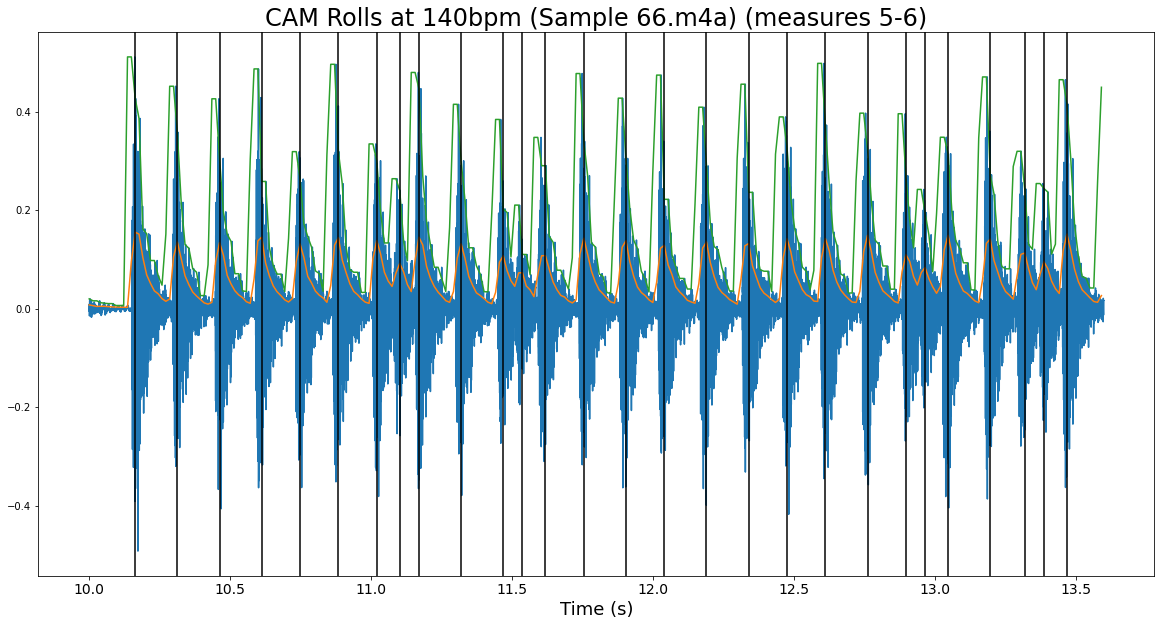

In [8]:
time_range = (10, 13.6)
#time_range = (0,60)

axs = nbt.plot_signal(signals[1], time_range=time_range)

axs = nbt.plot_rms_energy(signals[1], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, time_range=time_range, 
                          fmt='-', original_signal=False, axs=axs)
                          
axs = nbt.plot_amplitude_envelope(signals[1], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, 
                            title=plot_titles[1] + ' (measures 5-6)', time_range=time_range, 
                            fmt='-', original_signal=False, axs=axs)

for transient in transients[1]:
    if time_range[0] <= transient <= time_range[1]:
        axs.axvline(transient, color='black')

# Tap Diddles in CAM Rolls

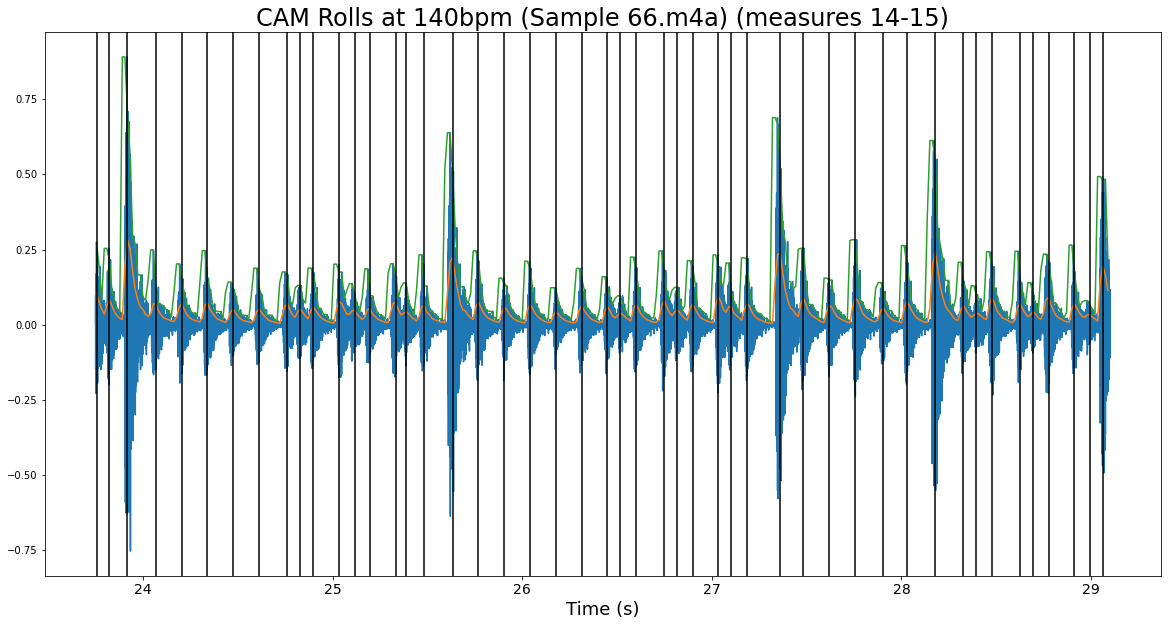

In [9]:
time_range = (23.75, 29.1)
#time_range = (0,60)

axs = nbt.plot_signal(signals[1], time_range=time_range)

axs = nbt.plot_rms_energy(signals[1], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, time_range=time_range, 
                          fmt='-', original_signal=False, axs=axs)
                          
axs = nbt.plot_amplitude_envelope(signals[1], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, 
                            title=plot_titles[1] + ' (measures 14-15)', time_range=time_range, 
                            fmt='-', original_signal=False, axs=axs)

for transient in transients[1]:
    if time_range[0] <= transient <= time_range[1]:
        axs.axvline(transient, color='black')

# Long Roll in CAM Rolls

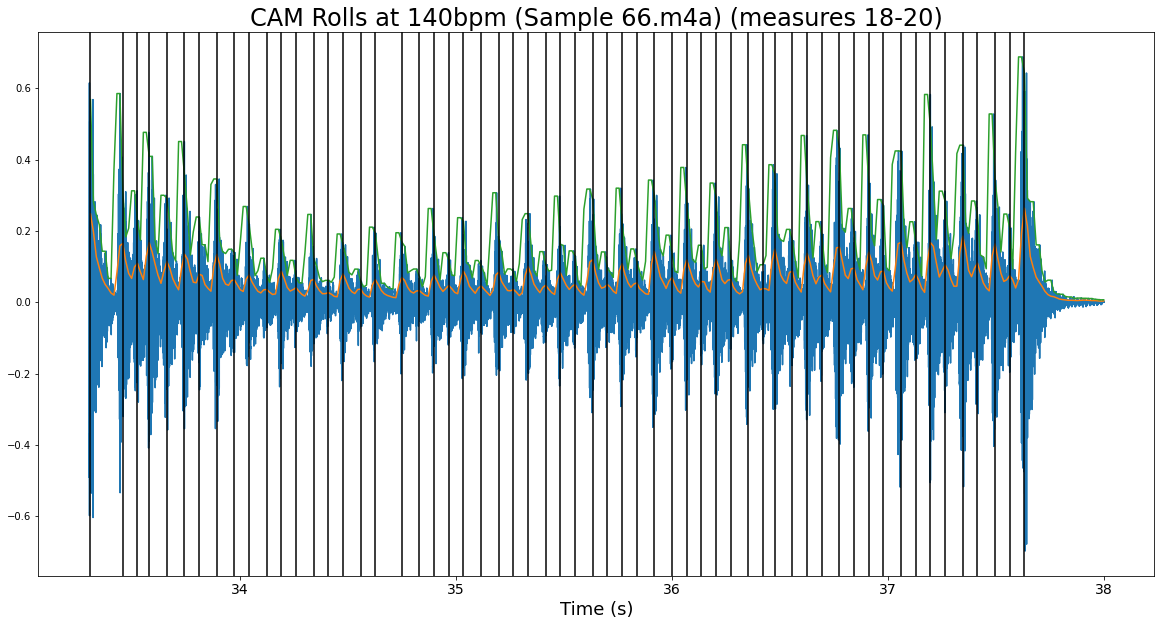

In [10]:
time_range = (33.3, 38)
#time_range = (0,60)

axs = nbt.plot_signal(signals[1], time_range=time_range)

axs = nbt.plot_rms_energy(signals[1], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, time_range=time_range, 
                          fmt='-', original_signal=False, axs=axs)
                          
axs = nbt.plot_amplitude_envelope(signals[1], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, 
                            title=plot_titles[1] + ' (measures 18-20)', time_range=time_range, 
                            fmt='-', original_signal=False, axs=axs)

for transient in transients[1]:
    if time_range[0] <= transient <= time_range[1]:
        axs.axvline(transient, color='black')

# Long Roll in Greenbeat

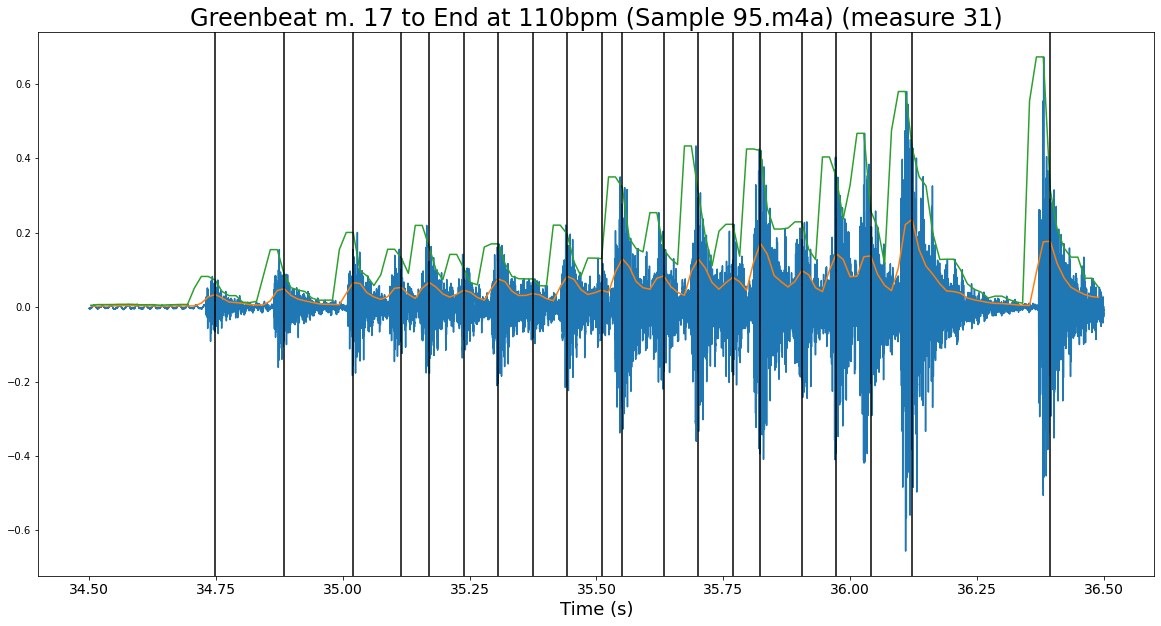

In [11]:
time_range = (34.5, 36.5)
#time_range = (0,60)

axs = nbt.plot_signal(signals[3], time_range=time_range)

axs = nbt.plot_rms_energy(signals[3], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, time_range=time_range, 
                          fmt='-', original_signal=False, axs=axs)
                          
axs = nbt.plot_amplitude_envelope(signals[3], frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, 
                            title=plot_titles[3] + ' (measure 31)', time_range=time_range, 
                            fmt='-', original_signal=False, axs=axs)

for transient in transients[3]:
    if time_range[0] <= transient <= time_range[1]:
        axs.axvline(transient, color='black')